In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import scipy as sp
import sympy as syp 
import random as rand
syp.interactive.printing.init_printing(use_latex= True)

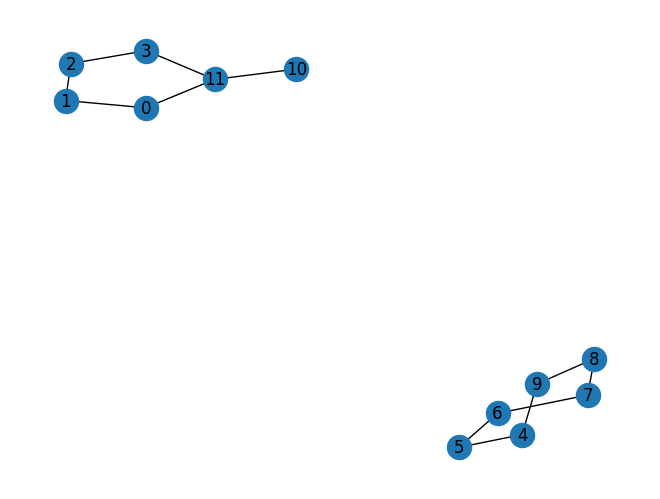

Eigenvalues of the Network:
[ 2.11490754+0.00000000e+00j  0.61803399+0.00000000e+00j
 -0.25410169+0.00000000e+00j -1.86080585+0.00000000e+00j
 -1.61803399+0.00000000e+00j -2.        +0.00000000e+00j
  2.        +0.00000000e+00j  1.        +0.00000000e+00j
 -1.        +0.00000000e+00j -1.        +0.00000000e+00j
  1.        +8.29096537e-17j  1.        -8.29096537e-17j]
Degree Distribution: [0, 1, 10, 1]
Partition Function: 12.0
Probabilities of each degree: [0.         0.08333333 0.83333333 0.08333333]
Entropy: 0.5660857389596289
Helmholtz Free Energy: -2.4849066497880004


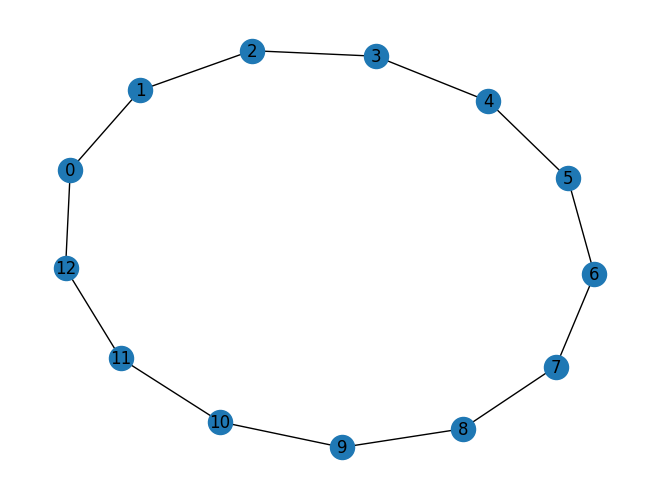

Eigenvalues of the Network:
[-1.94188363 -1.4970215  -0.70920977  0.24107336  1.13612949  2.
  1.77091205 -1.94188363 -1.4970215   1.77091205 -0.70920977  0.24107336
  1.13612949]
Partition Function: 13.0
Helmholtz Free Energy: -2.5649493574615367
Gibbs Free Energy: 0.9605124920824366


In [2]:
# generating the network and adjacency matrix
n = 12
k = 3
p = 0.1
G = nx.watts_strogatz_graph(n, k, p)
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
plt.show()
l = nx.to_numpy_array(G)
eig = np.linalg.eigvals(l)
print("Eigenvalues of the Network:")
print(eig)
deg_dis = nx.degree_histogram(G)
print("Degree Distribution:", deg_dis)

Z = np.trace(np.exp(((-1) * l)))
print("Partition Function:", Z)

prob = np.divide(deg_dis, n)
print("Probabilities of each degree:", prob)

S = - np.sum(np.fromiter((p * np.log(p) for p in prob if p != 0), dtype = float))
print("Entropy:", S)

F = - np.log(Z)
print("Helmholtz Free Energy:", F)

g = nx.watts_strogatz_graph(n+1, k, p)
pos = nx.spring_layout(g)
nx.draw(g, with_labels = True, pos = pos)
plt.show()

l1 = nx.to_numpy_array(g)
eig1 = np.linalg.eigvals(l1)
print("Eigenvalues of the Network:")
print(eig1)

Z1 = np.trace(np.exp(((-1) * l1)))
print("Partition Function:", Z1)

F1 = - np.log(Z1)
print("Helmholtz Free Energy:", F1)

G = n * (F - F1)
print("Gibbs Free Energy:", G)

In [8]:
def small_world_stat(n, k, p):
    G = nx.watts_strogatz_graph(n, k, p)
    
    l = nx.to_numpy_array(G)
    eig = np.linalg.eigvals(l)

    deg_dis = nx.degree_histogram(G)

    Z = np.trace(np.exp(((-1) * l)))

    prob = np.divide(deg_dis, n)

    S = - np.sum(np.fromiter((p * np.log(p) for p in prob if p != 0), dtype = float))

    F = - np.log(Z)

    g = nx.watts_strogatz_graph(n+1, k, p)

    l1 = nx.to_numpy_array(g)
    eig1 = np.linalg.eigvals(l1)

    Z1 = np.trace(np.exp(((-1) * l1)))

    F1 = - np.log(Z1)

    G = n * (F - F1)

    return Z, S, F, G

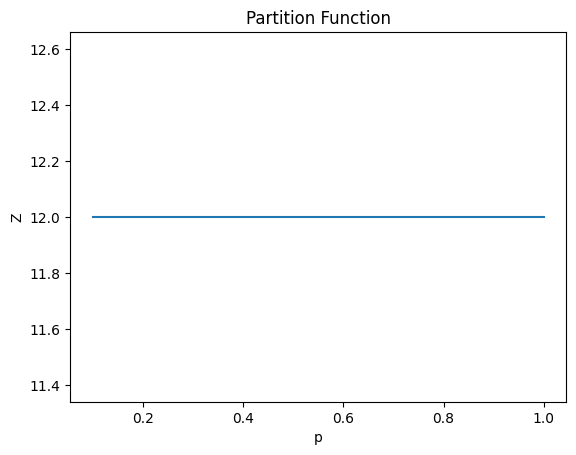

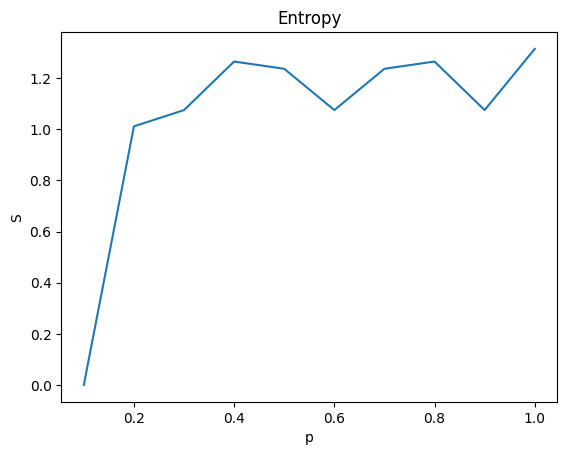

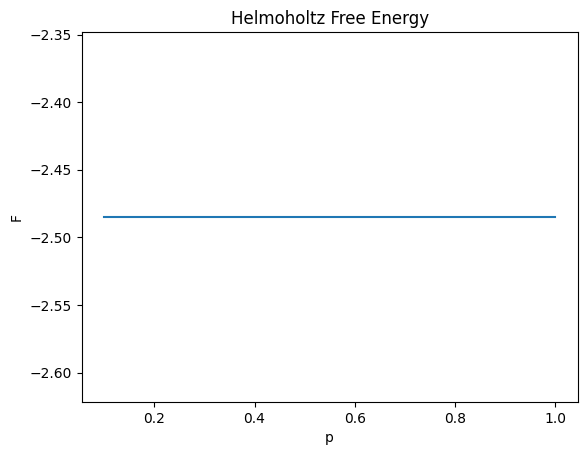

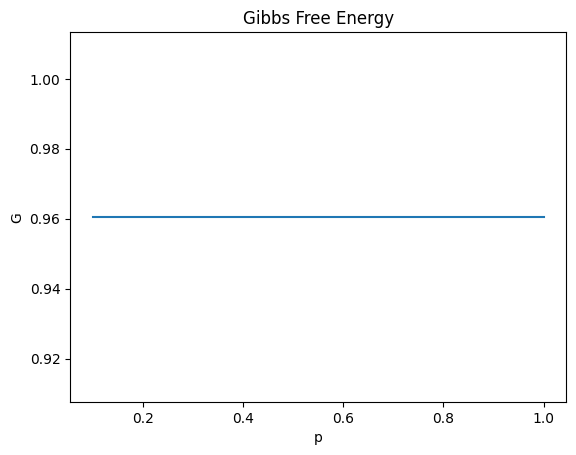

In [14]:
N = 10
z = np.zeros(N)
S = np.zeros(N)
F = np.zeros(N)
G = np.zeros(N)
p = np.zeros(N)
for i in range(1, N + 1):
    p[i-1] = i/N
    result = small_world_stat(n=12, k=3, p=i/N)
    Z[i-1], S[i-1], F[i-1], G[i-1] = result
plt.plot(p, Z, label = "Z")
plt.title("Partition Function")
plt.xlabel('p')
plt.ylabel('Z')
plt.show()
plt.plot(p, S, label = 'S')
plt.title("Entropy")
plt.xlabel('p')
plt.ylabel('S')
plt.show()
plt.plot(p, F, label = 'F')
plt.title("Helmoholtz Free Energy")
plt.xlabel('p')
plt.ylabel('F')
plt.show()
plt.plot(p, G, label = 'G')
plt.title("Gibbs Free Energy")
plt.xlabel('p')
plt.ylabel('G')
plt.show()

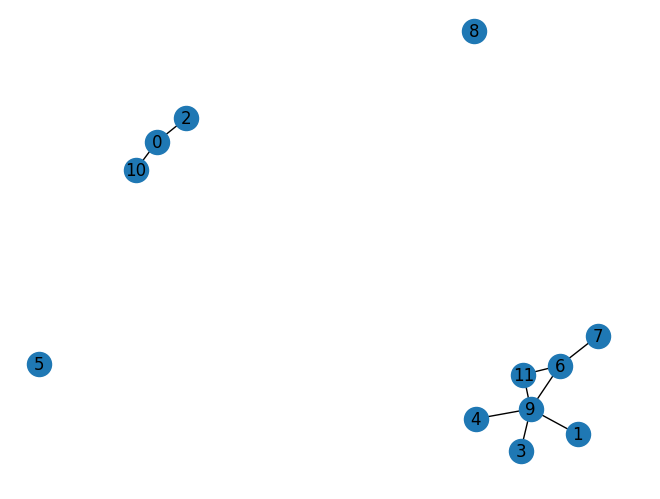

Eigenvalues of the Network:
[ 1.41421356e+00 -1.41421356e+00  2.59440037e+00  9.15882801e-01
  1.30933376e-16 -2.12202128e+00 -1.38826190e+00  8.85313927e-17
 -4.41555067e-17 -3.09527021e-18  0.00000000e+00  0.00000000e+00]
Degree distribution: [2, 6, 2, 1, 0, 1]
Partition Function: 12.0
Probabilities of each degree: [0.16666667 0.5        0.16666667 0.08333333 0.         0.08333333]
Entropy: 1.3579778549873245
Helmholtz Free Energy: -2.4849066497880004


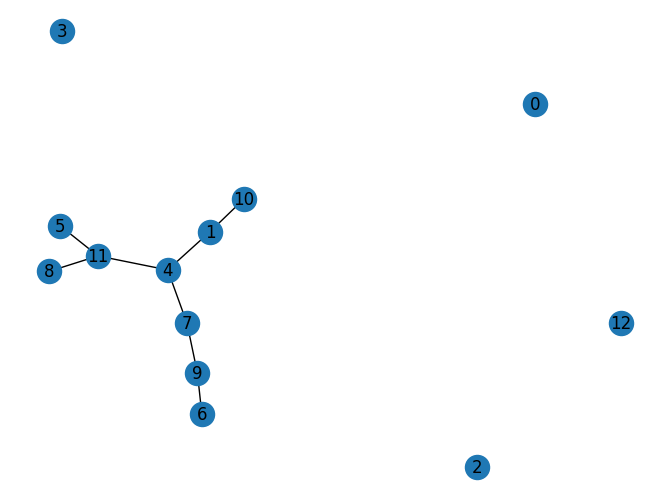

Eigenvalues of the Network:
[-2.11916578e+00  2.11916578e+00 -1.41421356e+00 -1.15904252e+00
  1.41421356e+00  1.15904252e+00 -4.07132430e-01  4.07132430e-01
 -2.58134205e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
Partition Function: 13.0
Helmholtz Free Energy: -2.5649493574615367
Gibbs Free Energy: 0.9605124920824366


In [ ]:
n = 12
p = 0.1
G = nx.erdos_renyi_graph(n, p)
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
plt.show()

l = nx.to_numpy_array(G)
eig = np.linalg.eigvals(l)
print("Eigenvalues of the Network:")
print(eig)

deg_dis = nx.degree_histogram(G)
print("Degree distribution:", deg_dis)

Z = np.trace(np.exp(((-1) * l)))
print("Partition Function:", Z)

prob = np.divide(deg_dis, n)
print("Probabilities of each degree:", prob)

S = - np.sum(np.fromiter((p * np.log(p) for p in prob if p != 0), dtype = float))
print("Entropy:", S)

F = - np.log(Z)
print("Helmholtz Free Energy:", F)

g = nx.erdos_renyi_graph(n+1, p)


l1 = nx.to_numpy_array(g)
eig1 = np.linalg.eigvals(l1)

Z1 = np.trace(np.exp(((-1) * l1)))

F1 = - np.log(Z1)

G = n * (F - F1)
print("Gibbs Free Energy:", G)

In [16]:
def random_stat(n, p):
    G = nx.erdos_renyi_graph(n, p)

    l = nx.to_numpy_array(G)
    eig = np.linalg.eigvals(l)

    deg_dis = nx.degree_histogram(G)

    Z = np.trace(np.exp(((-1) * l)))

    prob = np.divide(deg_dis, n)

    S = - np.sum(np.fromiter((p * np.log(p) for p in prob if p != 0), dtype = float))

    F = - np.log(Z)

    g = nx.erdos_renyi_graph(n+1, p)
    l1 = nx.to_numpy_array(g)
    eig1 = np.linalg.eigvals(l1)

    Z1 = np.trace(np.exp(((-1) * l1)))

    F1 = - np.log(Z1)

    G = n * (F - F1)

    return Z, S, F, G

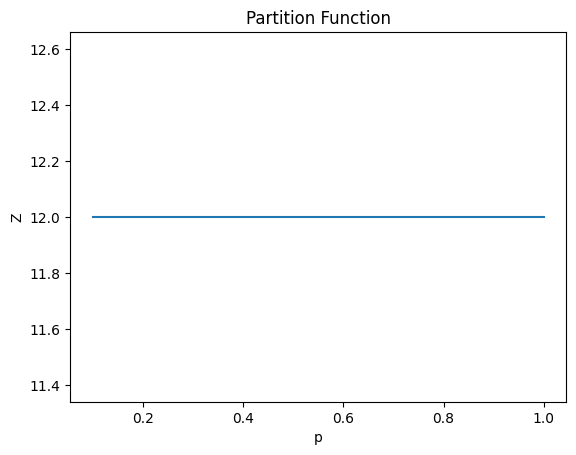

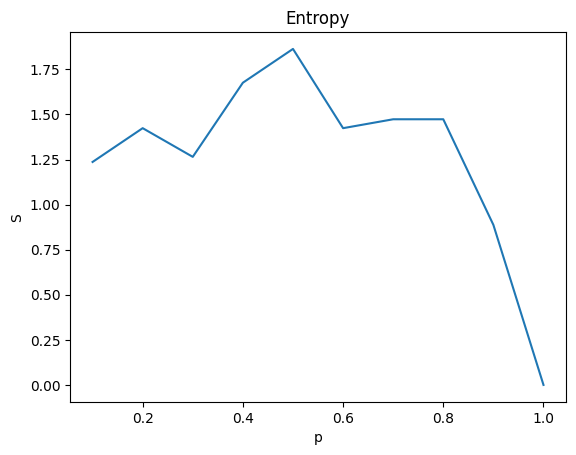

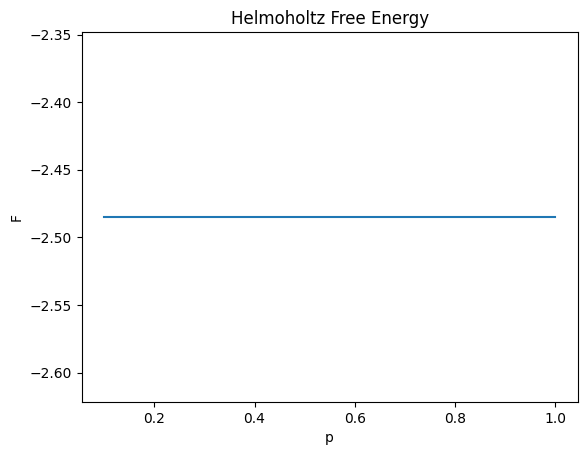

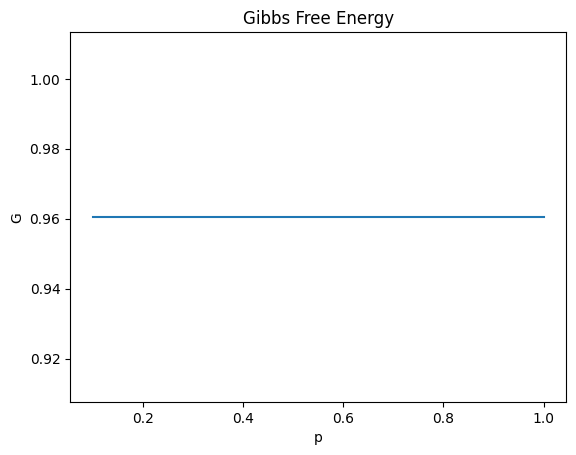

In [17]:
N = 10
z = np.zeros(N)
S = np.zeros(N)
F = np.zeros(N)
G = np.zeros(N)
p = np.zeros(N)
for i in range(1, N + 1):
    p[i-1] = i/N
    result = random_stat(n=12, p=i/N)
    Z[i-1], S[i-1], F[i-1], G[i-1] = result
plt.plot(p, Z, label = "Z")
plt.title("Partition Function")
plt.xlabel('p')
plt.ylabel('Z')
plt.show()
plt.plot(p, S, label = 'S')
plt.title("Entropy")
plt.xlabel('p')
plt.ylabel('S')
plt.show()
plt.plot(p, F, label = 'F')
plt.title("Helmoholtz Free Energy")
plt.xlabel('p')
plt.ylabel('F')
plt.show()
plt.plot(p, G, label = 'G')
plt.title("Gibbs Free Energy")
plt.xlabel('p')
plt.ylabel('G')
plt.show()

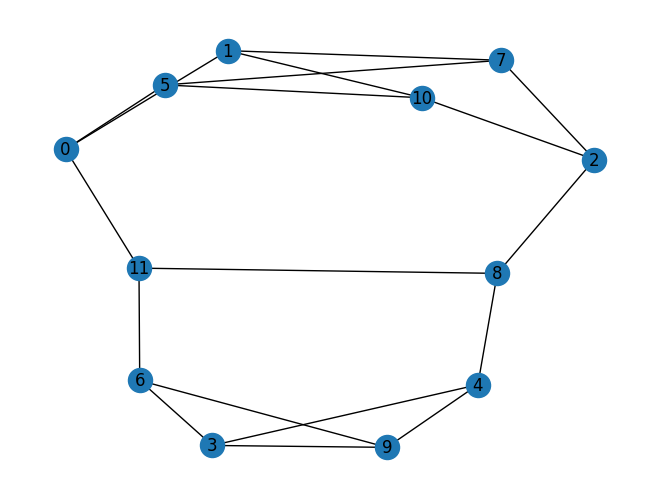

Eigenvalues of the Network:
[-2.89121985e+00  3.00000000e+00  2.65544238e+00  1.27841361e+00
  1.21075588e+00  3.17430608e-01 -1.86619826e+00 -1.70462437e+00
 -1.00000000e+00 -1.00000000e+00  5.80852991e-18 -2.98491875e-17]
Degree distribution: [0, 0, 0, 12]
Partition Function: 12.0
Probabilities of each degree: [0. 0. 0. 1.]
Entropy: -0.0
Helmholtz Free Energy: -2.4849066497880004


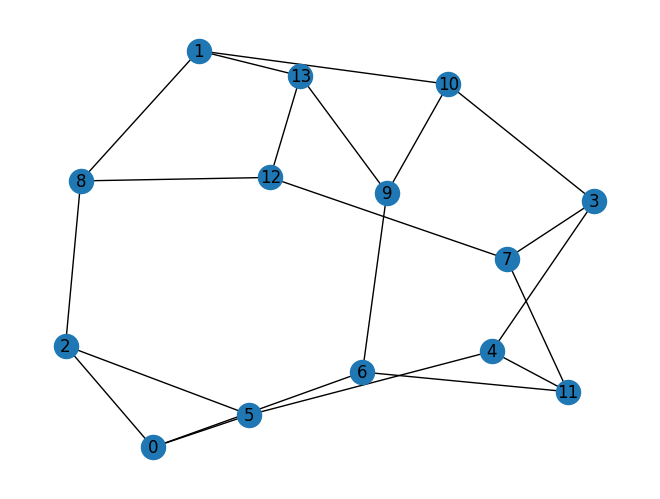

Eigenvalues of the Network:
[ 3.         -2.83053597  2.22575336  1.9447215  -2.21657523  1.53208889
  1.1953259  -1.87938524  0.34729636  0.28317757 -1.4508329  -1.
 -0.75242261 -0.39861163]
Partition Function: 14.0
Helmholtz Free Energy: -2.6390573296152584
Gibbs Free Energy: 1.8498081579270966


In [ ]:
d = 3
n = 12
G = nx.random_regular_graph(d, n)
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
plt.show()

l = nx.to_numpy_array(G)
eig = np.linalg.eigvals(l)
print("Eigenvalues of the Network:")
print(eig)

deg_dis = nx.degree_histogram(G)
print("Degree distribution:", deg_dis)

Z = np.trace(np.exp(((-1) * l)))
print("Partition Function:", Z)

prob = np.divide(deg_dis, n)
print("Probabilities of each degree:", prob)

S = - np.sum(np.fromiter((p * np.log(p) for p in prob if p != 0), dtype = float))
print("Entropy:", S)

F = - np.log(Z)
print("Helmholtz Free Energy:", F)

g = nx.random_regular_graph(d, n+2)
l1 = nx.to_numpy_array(g)
eig1 = np.linalg.eigvals(l1)

Z1 = np.trace(np.exp(((-1) * l1)))

F1 = - np.log(Z1)

G = n * (F - F1)
print("Gibbs Free Energy:", G)